<a href="https://colab.research.google.com/github/kashish1720/mldl_lab_sem6/blob/main/exp6/mldl_exp6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


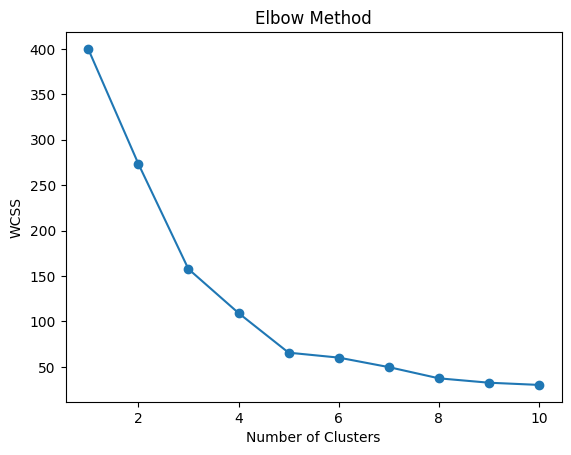

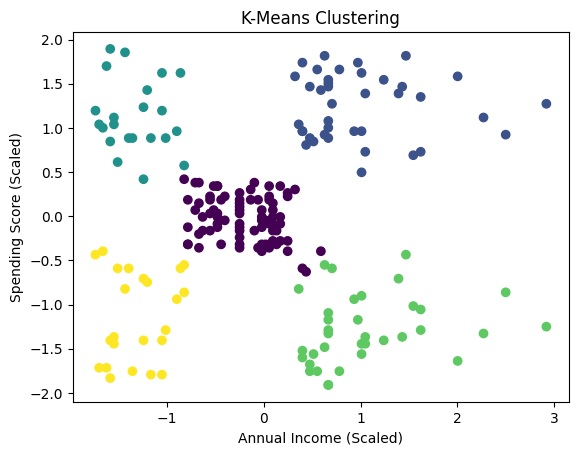

K-Means Silhouette Score: 0.5546571631111091

Silhouette Scores for different K values:
K = 2 Score = 0.3973270007887498
K = 3 Score = 0.46658474419000145
K = 4 Score = 0.49434988482196784
K = 5 Score = 0.5546571631111091
K = 6 Score = 0.5138257534676561
K = 7 Score = 0.50200146805547
K = 8 Score = 0.4550112502601921
K = 9 Score = 0.4566624374485964


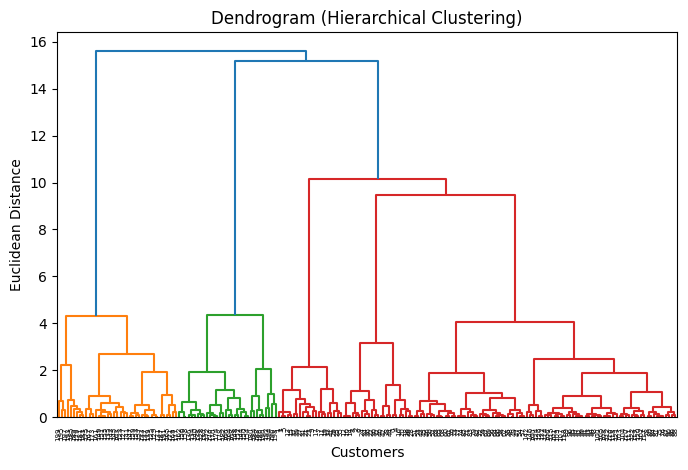

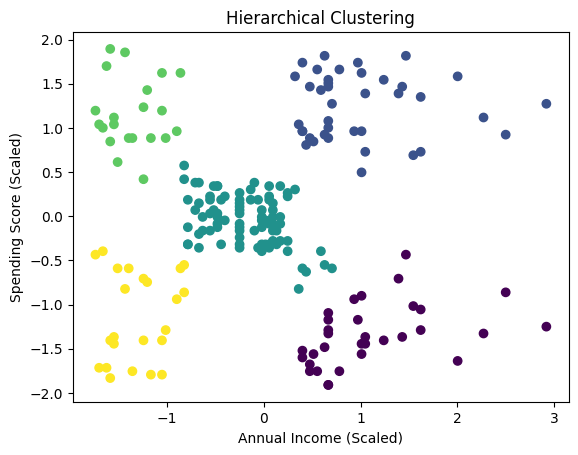

Hierarchical Silhouette Score: 0.5538089226688662

Hierarchical Linkage Comparison:
Linkage = ward Score = 0.5538089226688662
Linkage = complete Score = 0.5531118656926701
Linkage = average Score = 0.4794263081846086
Linkage = single Score = 0.2758004412314313

Final Comparison:
K-Means Silhouette Score: 0.5546571631111091
Hierarchical Silhouette Score: 0.5538089226688662


In [1]:
# ==========================================
# K-MEANS & HIERARCHICAL CLUSTERING
# Dataset: Mall_Customers.csv
# ==========================================

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# ------------------------------------------
# Load Dataset
# ------------------------------------------
df = pd.read_csv("/content/sample_data/Mall_Customers.csv")

print("Dataset Shape:", df.shape)
print(df.head())

# ------------------------------------------
# Feature Selection
# ------------------------------------------
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# ------------------------------------------
# Feature Scaling
# ------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==========================================
# K-MEANS CLUSTERING
# ==========================================

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# Apply K-Means (K=5)
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Visualization
plt.figure()
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans)
plt.title("K-Means Clustering")
plt.xlabel("Annual Income (Scaled)")
plt.ylabel("Spending Score (Scaled)")
plt.show()

# Silhouette Score
score_kmeans = silhouette_score(X_scaled, y_kmeans)
print("K-Means Silhouette Score:", score_kmeans)

# Hyperparameter Tuning (Different K values)
print("\nSilhouette Scores for different K values:")
for k in range(2, 10):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print("K =", k, "Score =", score)

# ==========================================
# HIERARCHICAL CLUSTERING
# ==========================================

# Dendrogram
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(8,5))
dendrogram(linked)
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

# Apply Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_hc = hc.fit_predict(X_scaled)

# Visualization
plt.figure()
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_hc)
plt.title("Hierarchical Clustering")
plt.xlabel("Annual Income (Scaled)")
plt.ylabel("Spending Score (Scaled)")
plt.show()

# Silhouette Score
score_hc = silhouette_score(X_scaled, y_hc)
print("Hierarchical Silhouette Score:", score_hc)

# Hyperparameter Tuning (Linkage Methods)
print("\nHierarchical Linkage Comparison:")
linkage_methods = ['ward', 'complete', 'average', 'single']

for method in linkage_methods:
    model = AgglomerativeClustering(n_clusters=5, linkage=method)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print("Linkage =", method, "Score =", score)

# Final Comparison
print("\nFinal Comparison:")
print("K-Means Silhouette Score:", score_kmeans)
print("Hierarchical Silhouette Score:", score_hc)